In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("Pune house data.xls")

In [7]:
df

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road


In [8]:
df.describe(include = object)

,area_type,availability,size,society,total_sqft,site_location
count,13320,13320,13304,7818,13320,13319
unique,4,81,31,2688,2117,97
top,Super built-up Area,Ready To Move,2 BHK,GrrvaGr,1200,Alandi Road
freq,8790,10581,5199,80,843,139


In [9]:
X = df.drop(columns='price')
Y = df['price']

from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size = 0.2 , random_state = 24)


In [10]:
def availabity(val):
    if val=='Ready To Move' or val== 'Immediate Possession':
        return 'Ready to Move'
    else:
        return 'Not Ready to Move'

X_train['availability'] = X_train['availability'].apply(availabity)
X_test['availability'] = X_test['availability'].apply(availabity)

In [11]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [12]:
X_train['availability'].value_counts()

availability
Ready to Move        8497
Not Ready to Move    2159
Name: count, dtype: int64

In [13]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
X_train['size'] = X_train['size'].astype(str)

X_train['size'] = X_train['size'].str.extract('(\d+)')
X_train['size']=X_train['size'].astype('float64')

X_test['size'] = X_test['size'].astype(str)

X_test['size'] = X_test['size'].str.extract('(\d+)')
X_test['size']=X_test['size'].astype('float64')

df['size'] = df['size'].astype(str)

df['size'] = df['size'].str.extract('(\d+)')
df['size']=df['size'].astype('float64')

In [15]:
X_train['size'].unique()

array([ 3.,  1.,  2.,  4.,  5.,  8.,  6., 10., nan,  9.,  7., 12., 16.,
       11., 14., 13., 27., 18.])

In [16]:
def convert_area(value):
    if '-' in value:
        low, high = map(float, value.split('-'))
        return (float(low) + float(high)) / 2
    try:
        return float(value)
    except:
        return None


X_train['total_sqft'] = X_train['total_sqft'].apply(convert_area)
X_train['total_sqft'] = X_train['total_sqft'].astype('float')

X_test['total_sqft'] = X_test['total_sqft'].apply(convert_area)
X_test['total_sqft'] = X_test['total_sqft'].astype('float')

df['total_sqft'] = df['total_sqft'].apply(convert_area)
df['total_sqft'] = df['total_sqft'].astype('float')

X_train['total_sqft'].unique()

array([1800.  , 1400.  ,  600.  , ..., 1218.  , 1248.52, 1321.  ])

<function matplotlib.pyplot.show(close=None, block=None)>

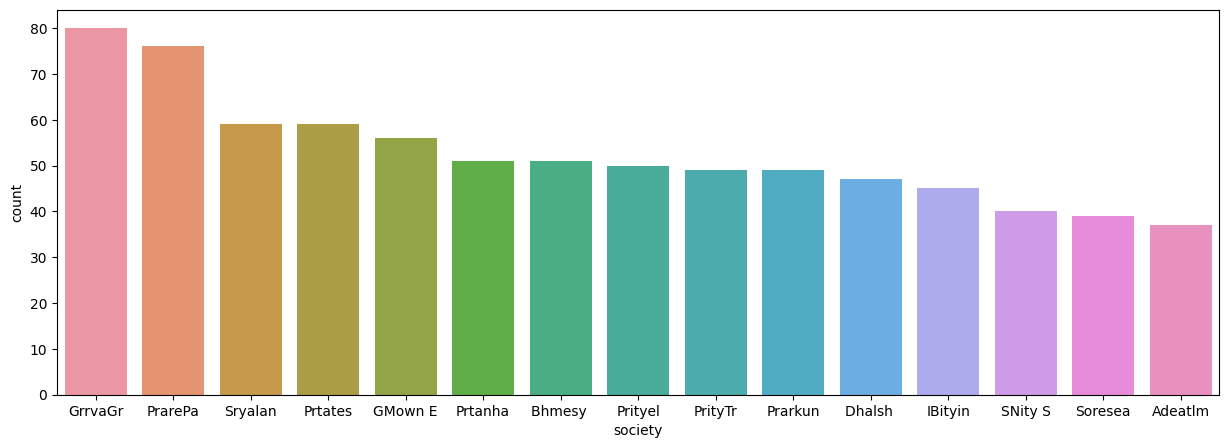

In [17]:
fig = plt.figure(figsize = (15,5))
sns.countplot(x= 'society', data = df , order = df['society'].value_counts().index[:15])
plt.show

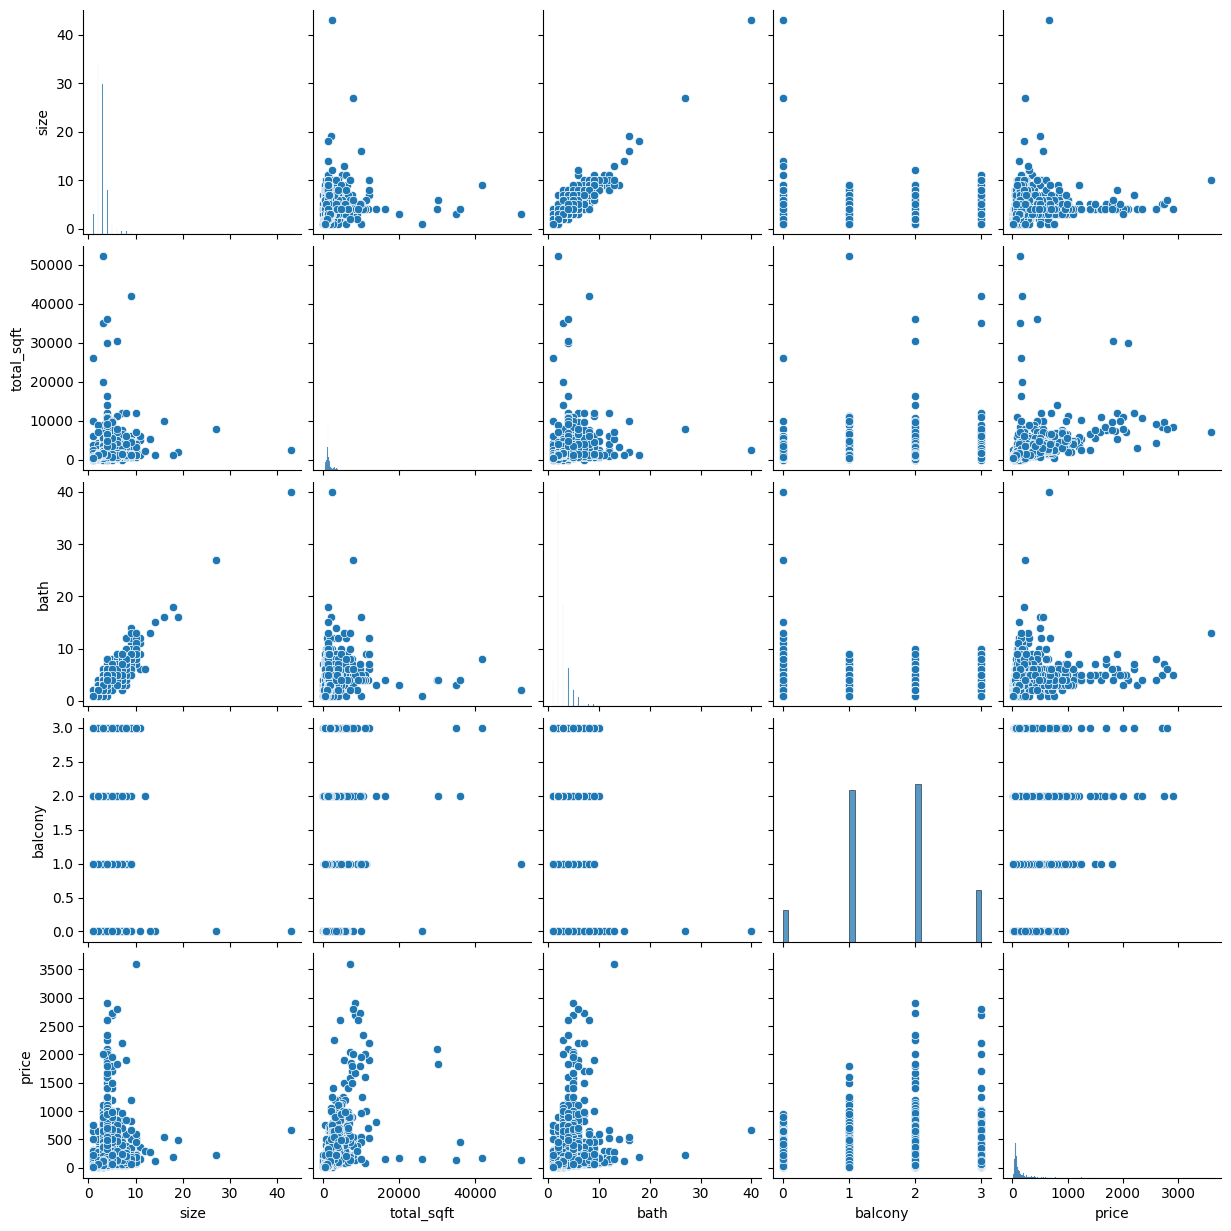

In [18]:
sns.pairplot(df)
plt.show()

In [19]:
from sklearn.preprocessing import QuantileTransformer

quantile_tra = QuantileTransformer(output_distribution = 'normal')

In [20]:
X_train.drop(columns=['bath','balcony'],inplace = True)
X_test.drop(columns=['bath','balcony'],inplace = True)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , StandardScaler

num_pipe = Pipeline([('imputer',SimpleImputer(strategy = 'median')),
                     ('quantile',QuantileTransformer(output_distribution='normal')),
                      ('std_scale',StandardScaler())])
cat_pipe = Pipeline([('imputer',SimpleImputer(strategy = 'most_frequent')),
                      ('onehot',OneHotEncoder(handle_unknown='ignore'))])



In [22]:
from sklearn.compose import ColumnTransformer

cat_col = ['area_type', 'society', 'availability', 'site_location']
num_col = ['size', 'total_sqft']

full_pipe = ColumnTransformer([
    ("num", num_pipe, num_col),
    ("cat", cat_pipe, cat_col)
])


In [23]:
quantile_transformer =QuantileTransformer(output_distribution='normal')

y_train_r = quantile_transformer.fit_transform(Y_train.values.reshape(-1,1))
y_test_r = quantile_transformer.transform(Y_test.values.reshape(-1,1))


In [24]:
x_train_r = full_pipe.fit_transform(X_train)
x_test_r = full_pipe.transform(X_test)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

models = {
    'Linear_Regression' : LinearRegression(),
    'Random_Forest' : RandomForestRegressor(n_estimators=200),
    'Gradient_Boosting' : GradientBoostingRegressor(),
    'KNeighbourRegressor' : KNR(n_neighbors=8),
    'DecisionTree' : DecisionTreeRegressor(),
    'SVM' : SVR()
    }

results = []

for name , model in models.items():
    predict = cross_val_predict(model , x_train_r , y_train_r , cv=3)
    mae  = mean_absolute_error(y_train_r, predict)
    mse = mean_squared_error(y_train_r, predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train_r , predict)

    results.append({
            "Model Name": name,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R² Score": r2
        })

results_df = pd.DataFrame(results)

results_df


,Model Name,MAE,MSE,RMSE,R² Score
0,Linear_Regression,0.365483,0.262725,0.512567,0.739143
1,Random_Forest,0.362064,0.252495,0.502488,0.749301
2,Gradient_Boosting,0.392150,0.265873,0.515629,0.736017
3,KNeighbourRegressor,0.410590,0.297531,0.545464,0.704585
4,DecisionTree,0.423524,0.361822,0.601516,0.640751
5,SVM,0.349447,0.235496,0.485279,0.766179


In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='r2',
return_train_score=True)
grid_search.fit(x_train_r, y_train_r)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='r2')

In [31]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [32]:
best_estimator=grid_search.best_estimator_

predict=best_estimator.predict(x_test_r)
mae = mean_absolute_error(y_test_r, predict)
r2 = r2_score(y_test_r, predict)
final=[]
final.append({
        "MAE": mae,
        "R² Score": r2
    })

finalresult = pd.DataFrame(final)
finalresult



,MAE,R² Score
0,0.390334,0.718923


In [33]:
grid_search.best_score_


0.7020485730948683

# Trying a custom input

In [63]:
custom_input = pd.DataFrame({
    'size': [4], 
    'total_sqft': [1000], 
    'area_type': ['Plot  Area'], 
    'society': ['Theanmp'], 
    'availability': ['Ready to move'], 
    'site_location': ['Bhavani Peth']
})

# Transform the input using the full pipeline
custom_input_transformed = full_pipe.transform(custom_input)

gbr = GradientBoostingRegressor()
gbr.fit(x_train_r, y_train_r)
prediction = gbr.predict(custom_input_transformed)
prediction_original_scale = quantile_transformer.inverse_transform(prediction.reshape(-1, 1))

print("Predicted value (Gradient Boosting):", prediction_original_scale)

Predicted value (Gradient Boosting): [[86.86905024]]
